In [1]:
import numpy as np
import pandas as pd
import json

import matplotlib.pyplot as plt
from matplotlib import cm

In [21]:
def get_learning_curves(result_row):
    
    # collect data
    sizes = []
    lcs_valid = []
    lcs_test = []
    for size, results_for_size in result_row.items():
        s = int(size)
        sizes.append(s)
        index1 = results_for_size[0].index([s, 0, 0])
        index2 = results_for_size[0].index([0, s, 0])
        index3 = results_for_size[0].index([0, 0, s])
        lcs_valid.append(tuple([results_for_size[1][i][0] for i in [index1, index2, index3]]))
        lcs_test.append(tuple([results_for_size[1][i][1] for i in [index1, index2, index3]]))
    return sizes, lcs_valid, lcs_test
    
def plot_triangle(result_row):
    
    # collect data
    points = []
    scores = []
    for size, results_for_size in result_row.items():
        points.extend(results_for_size[0])
        scores.extend([e[0] for e in results_for_size[1]])
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    p = np.array(points)
    scores_normalized = np.array(scores)
    scores_normalized = (scores_normalized - min(scores_normalized)) / (max(scores_normalized) - min (scores_normalized))
    ax.scatter(p[:,0], p[:,1], p[:,2], color=cm.get_cmap("Reds")(scores_normalized), cmap="Reds")

    ax.set_xlabel("num standard trees")
    ax.set_ylabel("num lda trees")
    ax.set_zlabel("num pca trees")

    plt.show()

In [3]:
df_results = pd.read_csv("results.csv", delimiter=";")
df_results

,experiment_id,openmlid,seed,cpus,memory_max,time_created,host,executor,time_started,results,exception,time_end
0,1,61,0,8,16000,2022-02-02 15:28:00,frank,mylap,2022-02-02 16:13:36,"{""1"": [[[0, 0, 1], [0, 1, 0], [1, 0, 0]], [[0....",NaN,2022-02-02 16:14:30


<IPython.core.display.Javascript object>


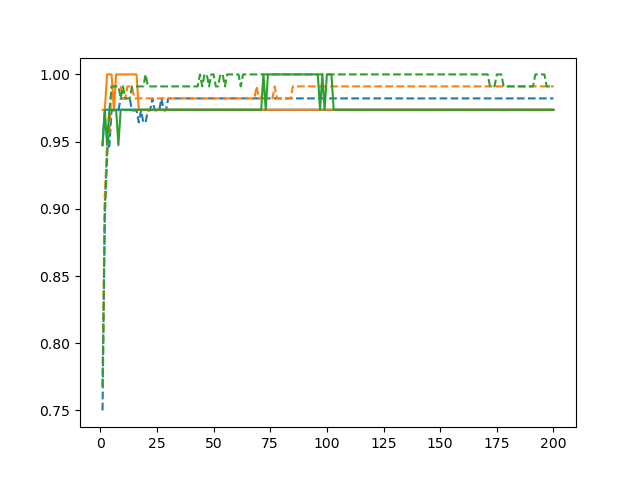

In [25]:
for i, row in df_results.iterrows():
    result = json.loads(row["results"])
    sizes, lcs_valid, lcs_test = get_learning_curves(result)
    fig, ax = plt.subplots()
    for j in range(3):
        ax.plot(sizes, [v[j] for v in lcs_valid], linestyle="--", color=f"C{j}")
        ax.plot(sizes, [v[j] for v in lcs_test], color=f"C{j}")

In [5]:
%matplotlib notebook
for i, row in df_results.iterrows():
    result = json.loads(row["results"])
    print(plot_result(result))

NameError: name 'plot_result' is not defined